In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set(style='whitegrid')


In [4]:
df = pd.read_csv("/Users/masondelan/Downloads/data/Occupancy_Estimation.csv")
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [5]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


Keeping data light-related

In [6]:

# keep light sensor columns + target
light_cols = ["S1_Light", "S2_Light", "S3_Light", "S4_Light"]
target_col = "Room_Occupancy_Count"

light_df = df[light_cols + [target_col]]
light_df.head()

,S1_Light,S2_Light,S3_Light,S4_Light,Room_Occupancy_Count
0,121,34,53,40,1
1,121,33,53,40,1
2,121,34,53,40,1
3,121,34,53,40,1
4,121,34,54,40,1


Summary stats for light sensors

In [7]:
light_summary = light_df[light_cols].describe().T
light_summary

,count,mean,std,min,25%,50%,75%,max
S1_Light,10129.0,25.445059,51.011264,0.0,0.0,0.0,12.0,165.0
S2_Light,10129.0,26.016290,67.304170,0.0,0.0,0.0,14.0,258.0
S3_Light,10129.0,34.248494,58.400744,0.0,0.0,0.0,50.0,280.0
S4_Light,10129.0,13.220259,19.602219,0.0,0.0,0.0,22.0,74.0


Percentage of zero values in each light sensor

In [8]:
zero_pct = (light_df[light_cols] == 0).mean() * 100
zero_pct.rename("percent_zero").to_frame()

,percent_zero
S1_Light,57.705598
S2_Light,57.715470
S3_Light,55.197946
S4_Light,55.276928


Histogram for each light sensor

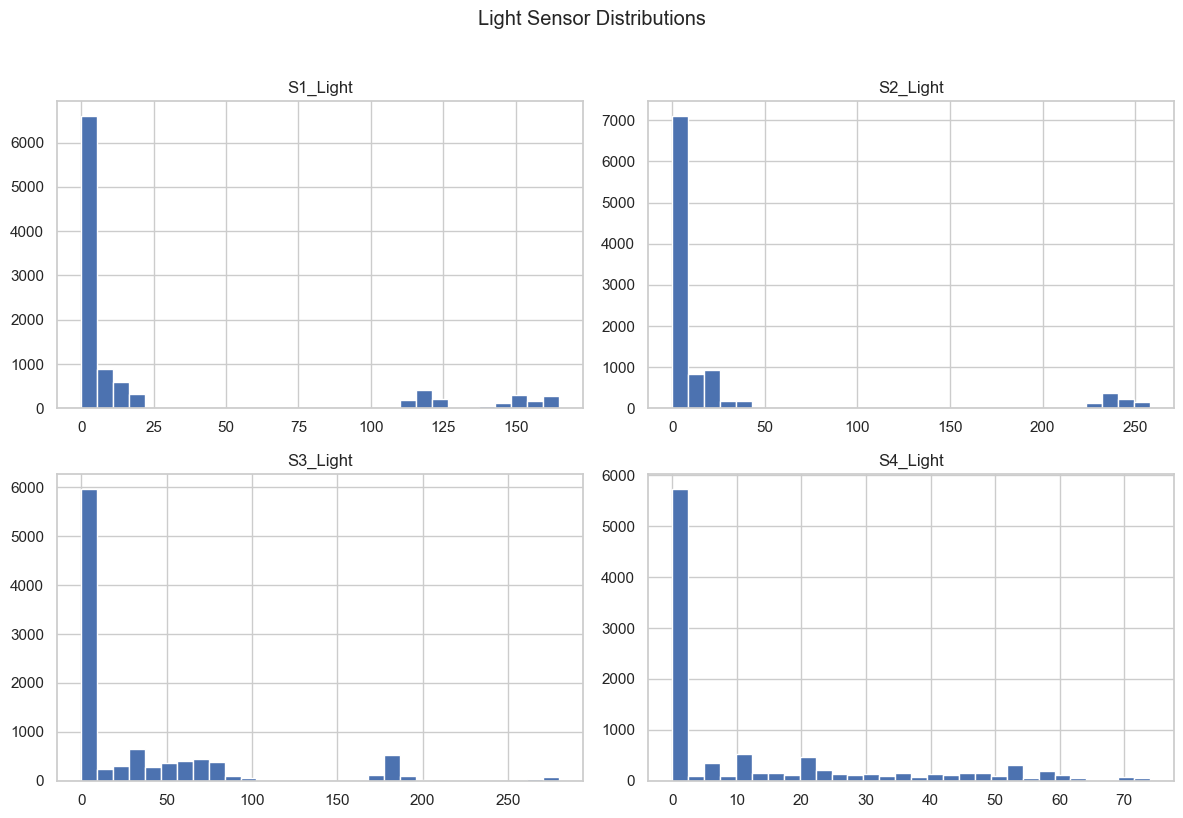

In [9]:
light_df[light_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Light Sensor Distributions", y=1.02)
plt.tight_layout()
plt.show()

Boxplots to show skew/outliers

The boxplots make it clear that all four light sensors sit at zero most of the time, which fits with the room being empty and the lights off. When the lights do turn on, the sensors jump to much higher values, creating a ton of upper outliers. S3_Light shows the biggest spread and highest peaks, meaning it’s probably closest to the main light source. S1_Light and S2_Light show moderate variation, while S4_Light stays on the lower side, suggesting it’s picking up less direct light. Overall, the boxplots show that light data has a strong “off vs on” pattern that lines up well with room activity.

/var/folders/p8/wbft2nyx6db6p036c9bcsgh80000gn/T/ipykernel_41801/697005953.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([light_df[col].dropna() for col in light_cols],


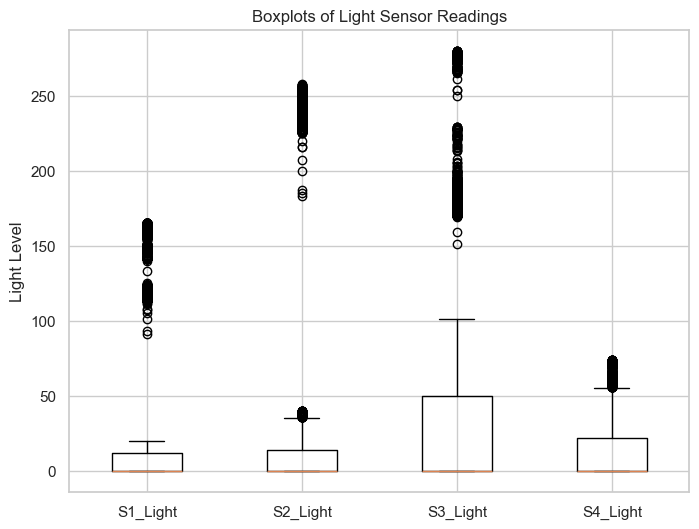

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot([light_df[col].dropna() for col in light_cols],
            labels=light_cols,
            showfliers=True)
plt.title("Boxplots of Light Sensor Readings")
plt.ylabel("Light Level")
plt.show()

Average light level by occupancy count

The mean light levels increase sharply as room occupancy rises, especially for S1–S3, confirming that brighter lighting consistently aligns with more people in the room. S2_Light and S3_Light show the strongest upward trend, suggesting they capture changes in ambient lighting most effectively. S4_Light remains relatively low and stable across occupancy levels, indicating weaker sensitivity or a different sensor position. Overall, the trend shows that higher occupancy corresponds to higher light readings, reinforcing light as a strong predictor for occupancy estimation.

In [11]:
light_by_occ = light_df.groupby(target_col)[light_cols].mean()
light_by_occ

,S1_Light,S2_Light,S3_Light,S4_Light
Room_Occupancy_Count,,,,
0,2.686558,3.053354,13.368498,9.234565
1,120.209150,31.427015,54.230937,37.579521
2,136.109626,134.804813,138.339572,30.482620
3,113.317003,177.430836,156.393372,25.757925


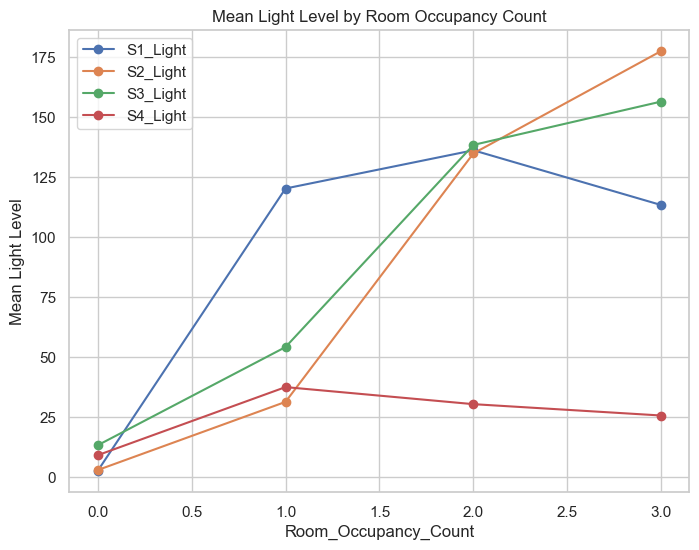

In [12]:
plt.figure(figsize=(8, 6))
for col in light_cols:
    plt.plot(light_by_occ.index, light_by_occ[col], marker="o", label=col)

plt.title("Mean Light Level by Room Occupancy Count")
plt.xlabel("Room_Occupancy_Count")
plt.ylabel("Mean Light Level")
plt.legend()
plt.show()


Correlation between light sensors and occupancy:

The light sensors show strong positive correlations with each other and with room occupancy, indicating that light levels reliably increase when the room is occupied. S1–S3 provide the strongest signal, while S4_Light is weaker due to lower variance and more frequent zero readings. Overall, lighting is a meaningful predictor of occupancy and will likely play an important role in the final modeling phase.


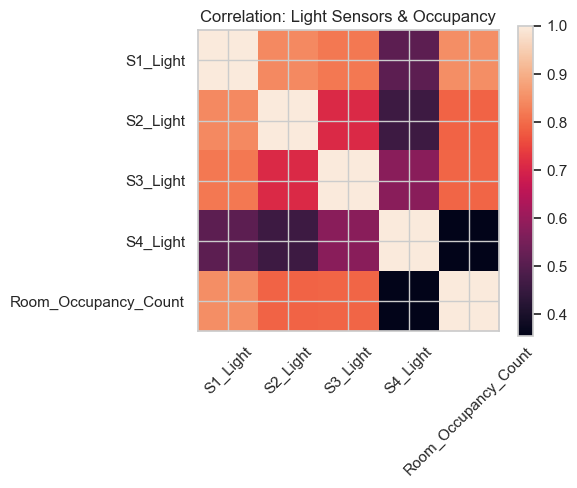

In [14]:
corr_light = light_df[light_cols + [target_col]].corr()
corr_light
plt.figure(figsize=(6, 5))
plt.imshow(corr_light, interpolation="nearest")
plt.xticks(range(len(corr_light.columns)), corr_light.columns, rotation=45)
plt.yticks(range(len(corr_light.index)), corr_light.index)
plt.colorbar()
plt.title("Correlation: Light Sensors & Occupancy")
plt.tight_layout()
plt.show()

Temperature Sensors S1-S4

Histograms

All four temperature sensors show a fairly narrow range, mostly between 24.5°C and 26.5°C. The distributions are slightly different across sensors, but overall the temperatures remain stable throughout the dataset. Small variations appear across the sensors, which makes sense given different positions in the room. Although the differences are subtle, temperature still rises slightly with higher occupancy, which aligns with the earlier correlation results.

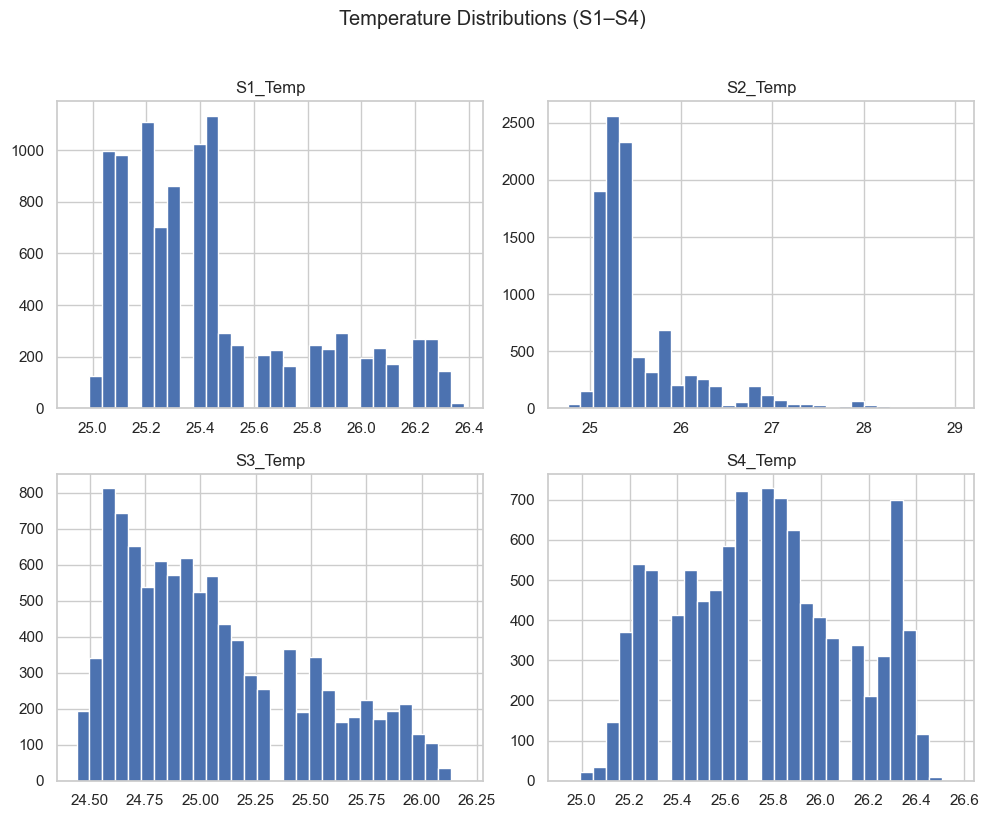

In [15]:
temp_cols = ["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp"]

df[temp_cols].hist(figsize=(10, 8), bins=30)
plt.suptitle("Temperature Distributions (S1–S4)", y=1.02)
plt.tight_layout()
plt.show()


Sound Sensors S1-S4

Histograms

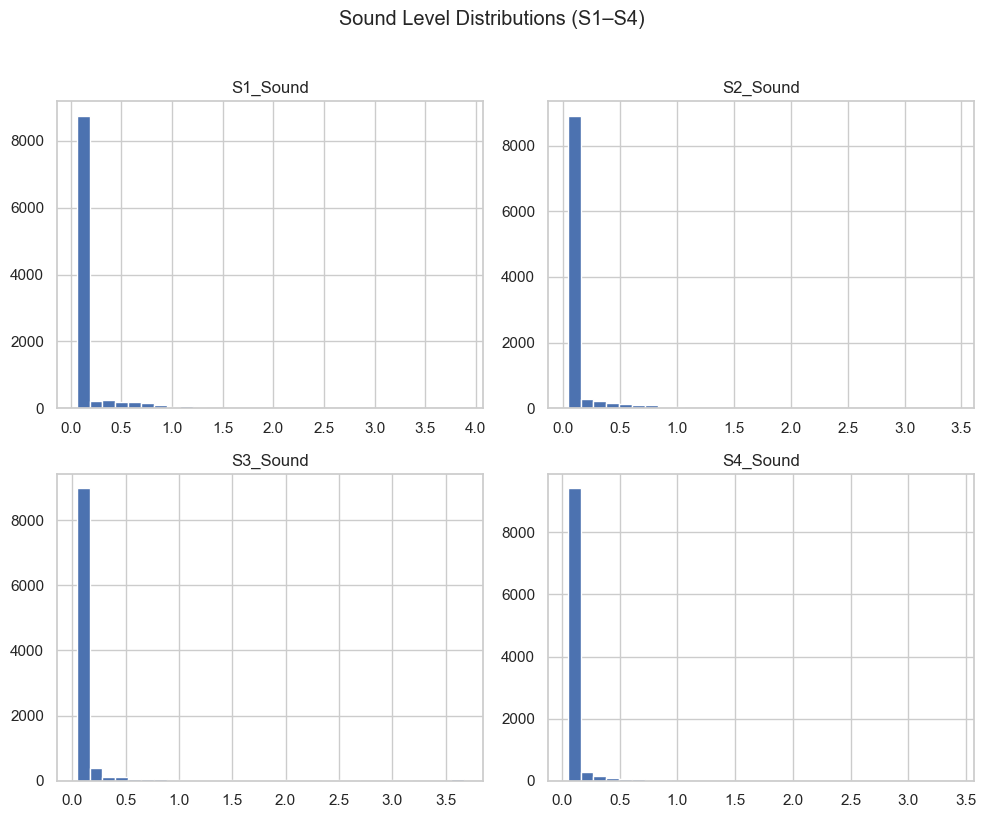

In [16]:
sound_cols = ["S1_Sound", "S2_Sound", "S3_Sound", "S4_Sound"]

df[sound_cols].hist(figsize=(10, 8), bins=30)
plt.suptitle("Sound Level Distributions (S1–S4)", y=1.02)
plt.tight_layout()
plt.show()


Boxplots by Occupancy

Sound levels increase as room occupancy increases. When the room is empty, all four sound sensors show very low activity with minimal variation. As occupancy rises from 1 to 3 people, each sensor shows higher medians and a larger spread of values, along with more frequent spikes. This indicates that sound activity does reflect changes in occupancy, although the relationship is more variable compared to sensors like light or CO₂.

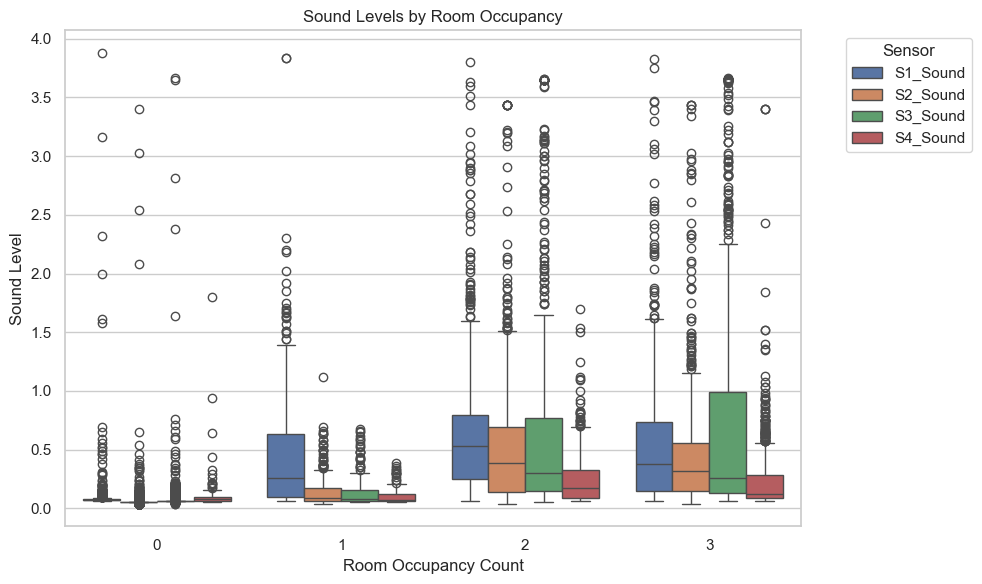

In [17]:
plt.figure(figsize=(10, 6))
df_melt_sound = df[sound_cols + ["Room_Occupancy_Count"]].melt(
    id_vars="Room_Occupancy_Count", var_name="Sensor", value_name="Sound"
)

sns.boxplot(
    data=df_melt_sound,
    x="Room_Occupancy_Count",
    y="Sound",
    hue="Sensor"
)
plt.title("Sound Levels by Room Occupancy")
plt.xlabel("Room Occupancy Count")
plt.ylabel("Sound Level")
plt.legend(title="Sensor", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

CO₂ and CO₂ Slope

Histogram & basic stats

/var/folders/p8/wbft2nyx6db6p036c9bcsgh80000gn/T/ipykernel_41801/1279621667.py:5: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/masondelan/Desktop/USD/ADS_CODE/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


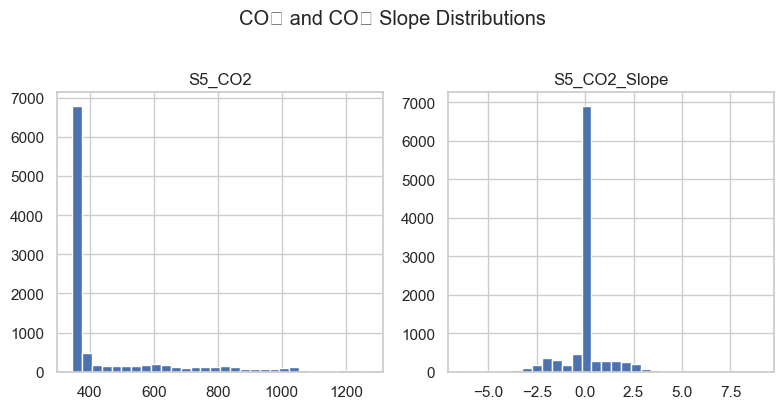

,S5_CO2,S5_CO2_Slope
count,10129.000000,10129.000000
mean,460.860401,-0.004830
std,199.964940,1.164990
min,345.000000,-6.296154
25%,355.000000,-0.046154
50%,360.000000,0.000000
75%,465.000000,0.000000
max,1270.000000,8.980769


In [18]:
co2_cols = ["S5_CO2", "S5_CO2_Slope"]

df[co2_cols].hist(figsize=(8, 4), bins=30)
plt.suptitle("CO₂ and CO₂ Slope Distributions", y=1.02)
plt.tight_layout()
plt.show()

df[co2_cols].describe()


CO₂ vs Occupancy (boxplot)

CO₂ levels are low when the room is empty and increase as more people enter. Each higher occupancy level shows a clear jump in median CO₂, along with a wider range of values. This shows that CO₂ rises consistently with the number of people in the room.

/Users/masondelan/Desktop/USD/ADS_CODE/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


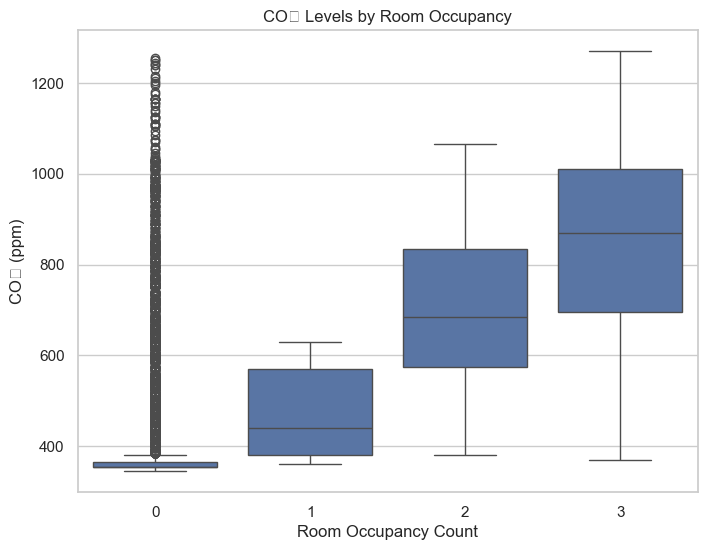

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="Room_Occupancy_Count",
    y="S5_CO2"
)
plt.title("CO₂ Levels by Room Occupancy")
plt.xlabel("Room Occupancy Count")
plt.ylabel("CO₂ (ppm)")
plt.show()


PIR Sensors + Occupancy


PIR Distributions

In [21]:
pir_cols = ["S6_PIR", "S7_PIR"]

df[pir_cols].sum()


S6_PIR    913
S7_PIR    806
dtype: int64

Bar chart of PIR activations

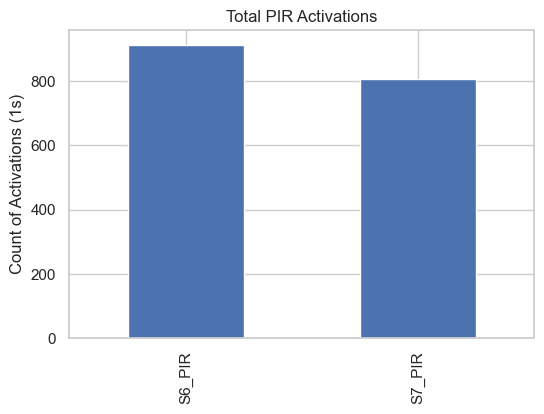

In [22]:
pir_counts = df[pir_cols].sum()

plt.figure(figsize=(6, 4))
pir_counts.plot(kind="bar")
plt.title("Total PIR Activations")
plt.ylabel("Count of Activations (1s)")
plt.show()


Relationship between PIR and occupancy


When the PIR sensors are 0 (no motion detected), the average room occupancy is around 0.22 people, meaning the room is usually empty.
When the PIR sensors are 1 (motion detected), the average occupancy increases to 2.20 people for S6_PIR and 2.51 people for S7_PIR.


In [23]:
# mean occupancy when PIR is active
for col in pir_cols:
    print(f"\n{col}")
    print(df.groupby(col)["Room_Occupancy_Count"].mean())



S6_PIR
S6_PIR
0    0.220486
1    2.196057
Name: Room_Occupancy_Count, dtype: float64

S7_PIR
S7_PIR
0    0.215918
1    2.511166
Name: Room_Occupancy_Count, dtype: float64


Target Variable: Room_Occupancy_Count

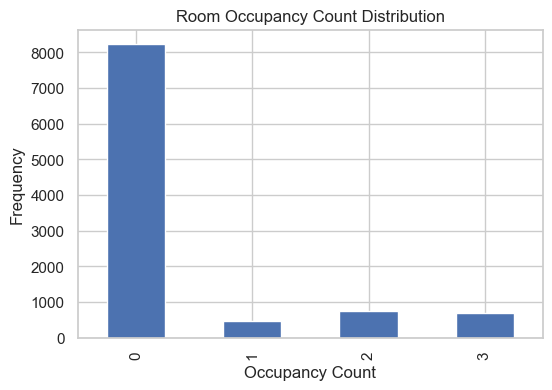

Room_Occupancy_Count
0    8228
1     459
2     748
3     694
Name: count, dtype: int64

In [24]:
occ_counts = df["Room_Occupancy_Count"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
occ_counts.plot(kind="bar")
plt.title("Room Occupancy Count Distribution")
plt.xlabel("Occupancy Count")
plt.ylabel("Frequency")
plt.show()

occ_counts


Correlation Heatmap (all numeric sensors & occupancy)

The heatmap shows that several sensors have strong relationships with room occupancy. The light sensors (S1–S3) have the highest correlations, meaning light levels change the most when people are in the room. Temperature sensors also rise with occupancy and show moderately strong correlations. The PIR motion sensors (S6 and S7) are strongly correlated as well, which makes sense because more people create more movement.

CO₂ and CO₂ slope are also good indicators of occupancy, since CO₂ levels increase as more people stay in the room. Sound sensors show moderate correlations, meaning noise levels help but are not as strong as light or CO₂.

Overall, light, temperature, PIR motion, and CO₂ are the best predictors of occupancy in this dataset.

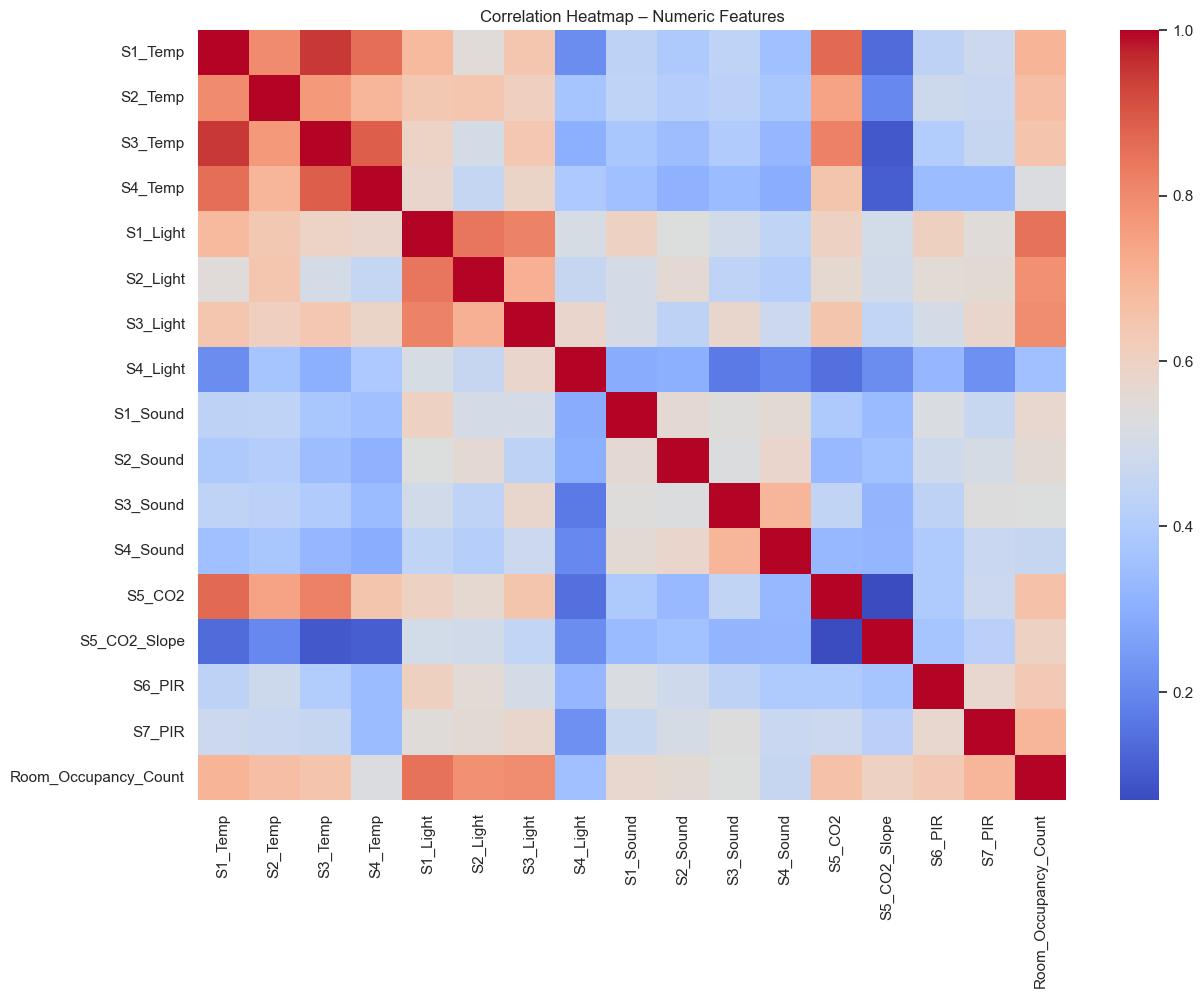

In [25]:
# numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Correlation Heatmap – Numeric Features")
plt.show()


In [26]:
corr_with_occ = numeric_df.corr()["Room_Occupancy_Count"].sort_values(ascending=False)
corr_with_occ


Room_Occupancy_Count    1.000000
S1_Light                0.849058
S3_Light                0.793081
S2_Light                0.788764
S1_Temp                 0.700868
S7_PIR                  0.695138
S2_Temp                 0.671263
S5_CO2                  0.660144
S3_Temp                 0.652047
S6_PIR                  0.633133
S5_CO2_Slope            0.601105
S1_Sound                0.573748
S2_Sound                0.557853
S3_Sound                0.531685
S4_Temp                 0.526509
S4_Sound                0.460287
S4_Light                0.355715
Name: Room_Occupancy_Count, dtype: float64

# checking